In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [199]:
df = pd.read_csv("insurance_data.csv")

In [200]:
df.head() # by default top 5 rows will reflect

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


In [201]:
df.tail() # by default bottom 5 rows will reflect

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
1335,1335,1336,44.0,female,35.5,88,Yes,0,Yes,northwest,55135.40
1336,1336,1337,59.0,female,38.1,120,No,1,Yes,northeast,58571.07
1337,1337,1338,30.0,male,34.5,91,Yes,3,Yes,northwest,60021.40
1338,1338,1339,37.0,male,30.4,106,No,0,Yes,southeast,62592.87
1339,1339,1340,30.0,female,47.4,101,No,0,Yes,southeast,63770.43


In [202]:
df.shape

(1340, 11)

In [203]:
# our dataset has 1340 rows and 11 columns

In [204]:
df.dtypes

index              int64
PatientID          int64
age              float64
gender            object
bmi              float64
bloodpressure      int64
diabetic          object
children           int64
smoker            object
region            object
claim            float64
dtype: object

In [205]:
# Our data hot both numerical and categorical columns
# label column is claim

In [206]:
df.select_dtypes(include='number')

,index,PatientID,age,bmi,bloodpressure,children,claim
0,0,1,39.0,23.2,91,0,1121.87
1,1,2,24.0,30.1,87,0,1131.51
2,2,3,NaN,33.3,82,0,1135.94
3,3,4,NaN,33.7,80,0,1136.40
4,4,5,NaN,34.1,100,0,1137.01
...,...,...,...,...,...,...,...
1335,1335,1336,44.0,35.5,88,0,55135.40
1336,1336,1337,59.0,38.1,120,1,58571.07
1337,1337,1338,30.0,34.5,91,3,60021.40
1338,1338,1339,37.0,30.4,106,0,62592.87


In [207]:
# Displays all numerical columns

In [208]:
df.select_dtypes(include='object')

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
2,male,Yes,No,southeast
3,male,No,No,northwest
4,male,No,No,northwest
...,...,...,...,...
1335,female,Yes,Yes,northwest
1336,female,No,Yes,northeast
1337,male,Yes,Yes,northwest
1338,male,No,Yes,southeast


In [209]:
# Displays all categorical columns

### measures of central tendency

In [210]:
# summary statistics of numeric columns
df.describe(include='number')

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [211]:
# All the columns has 1340 rows however age has 5 missing rows 
# we see that for age column mean is 38.07, standard deviation is 11.10, 1st quartile is 29, median is 29 and 3rd quartile is 47
# Claim column has a wide range might have outliers

In [212]:
# summary statistics of numeric columns
df.describe(include='object')

,gender,diabetic,smoker,region
count,1340,1340,1340,1337
unique,2,2,2,4
top,male,No,No,southeast
freq,678,698,1066,443


In [213]:
# We see that most frequent gender is male(678) and region is southeast
# Number of people who donot have diabetes(698) are less than that of those who have diabetes
# There are more non smokers(1066) compared to that of smokers

In [214]:
# Calculate mean, median, and mode of a specific column
mean_bmi = df["bmi"].mean()
median_bmi = df["bmi"].median()
mode_bmi = df["bmi"].mode().values[0]

print("Mean BMI:", mean_bmi)
print("Median BMI:", median_bmi)
print("Mode BMI:", mode_bmi)

Mean BMI: 30.668955223880598
Median BMI: 30.4
Mode BMI: 27.6


In [215]:
# From above claculation we see that mean, median and mode is 30.66, 30.4 and 27.6 respectively

In [216]:
# check counts of individual column, say gender
df.gender.value_counts()

male      678
female    662
Name: gender, dtype: int64

In [217]:
# There are 678 males and 662 females

### measures of dispersion

In [218]:
df.age.max(), df.age.min()

(60.0, 18.0)

In [219]:
# max age is 60 and minimum is 18, same is observed in summary statistics

In [220]:
# to find range of age
df.age.max()- df.age.min()

42.0

In [221]:
# Range is 42

In [222]:
df_num = df.select_dtypes(include='number')

In [223]:
# Finding range for all numerical columns together

df_num.max() - df_num.min()

index             1339.00
PatientID         1339.00
age                 42.00
bmi                 37.10
bloodpressure       60.00
children             5.00
claim            62648.56
dtype: float64

In [224]:
# to find standard deviation of all numerical columns

df_num.std()

index              386.968991
PatientID          386.968991
age                 11.102924
bmi                  6.106735
bloodpressure       11.434712
children             1.205334
claim            12109.609288
dtype: float64

In [225]:
# The std deviation of claim is very high, it might have outliers

### Measures of Location

In [226]:
# to check 2nd quartile or median for bloodpressure
np.quantile(df.bloodpressure,0.5), df.bloodpressure.median()

(92.0, 92.0)

In [227]:
np.quantile(df.bloodpressure,0.25), np.quantile(df.bloodpressure,0.5), np.quantile(df.bloodpressure,0.75)

(86.0, 92.0, 99.0)

In [228]:
# Calculate the 25th, 50th (median), and 75th percentiles of a specific column
percentiles = np.percentile(df["bmi"], [25, 50, 75])

print("25th Percentile of BMI:", percentiles[0])
print("Median (50th Percentile) of BMI:", percentiles[1])
print("75th Percentile of BMI:", percentiles[2])

25th Percentile of BMI: 26.275
Median (50th Percentile) of BMI: 30.4
75th Percentile of BMI: 34.7


In [229]:
# Calculate any quantile in a column. this can be used to get the Q1, Q2, Q3, deciles or any percentiles also.

Q1_BMI = np.quantile(df["bmi"],0.25)
median_BMI = np.quantile(df["bmi"],0.5)
Q3_BMI = np.quantile(df["bmi"],0.75)

IQR_BMI = Q3_BMI - Q1_BMI

print("first quartile:", Q1_BMI)
print("third quartile:", Q3_BMI)
print("IQR:", IQR_BMI)
print("median or Q2:", median_BMI)

first quartile: 26.275
third quartile: 34.7
IQR: 8.425000000000004
median or Q2: 30.4


In [343]:
pd.pivot_table(data=df,values='claim',index='gender',columns='region',aggfunc='mean')


region,northeast,northwest,southeast,southwest
gender,,,,
female,13555.096061,10474.668497,8533.602020,8387.077347
male,12444.626392,8864.110180,8794.055706,10039.865573


In [344]:
pd.crosstab(index=df['smoker'],columns=df['region'])

region,northeast,northwest,southeast,southwest
smoker,,,,
No,159,283,347,253
Yes,37,37,33,25


In [345]:
pd.crosstab(index=df['smoker'],columns=df['gender'])


gender,female,male
smoker,,
No,539,503
Yes,63,69


In [230]:
### Data Visualisation

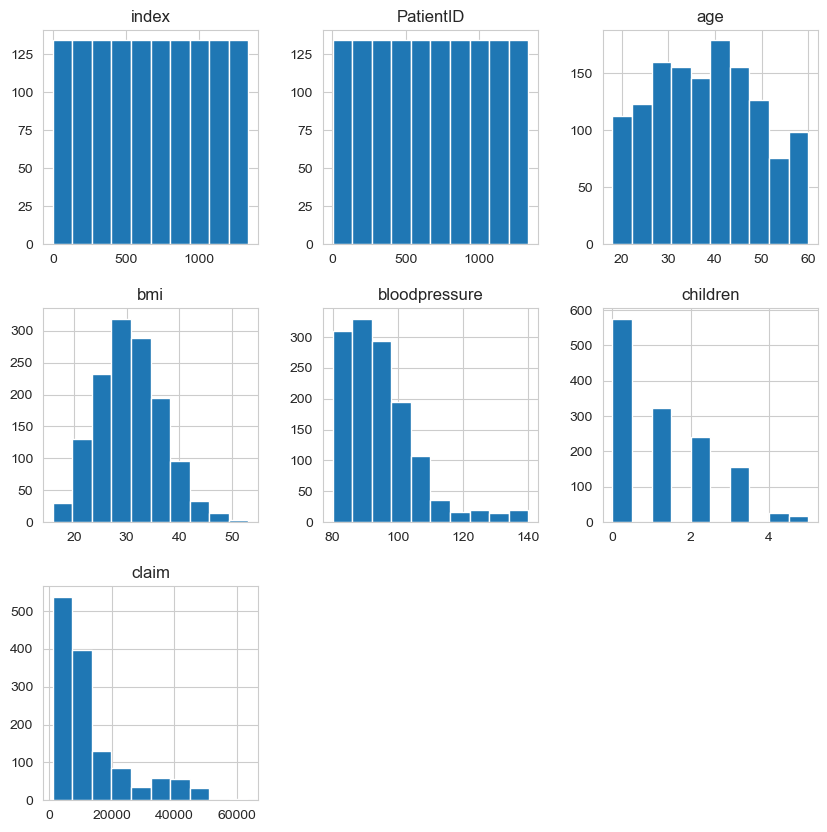

In [231]:
# Histogram for each  feature
df.hist(bins=10,figsize=(10,10))
plt.show()

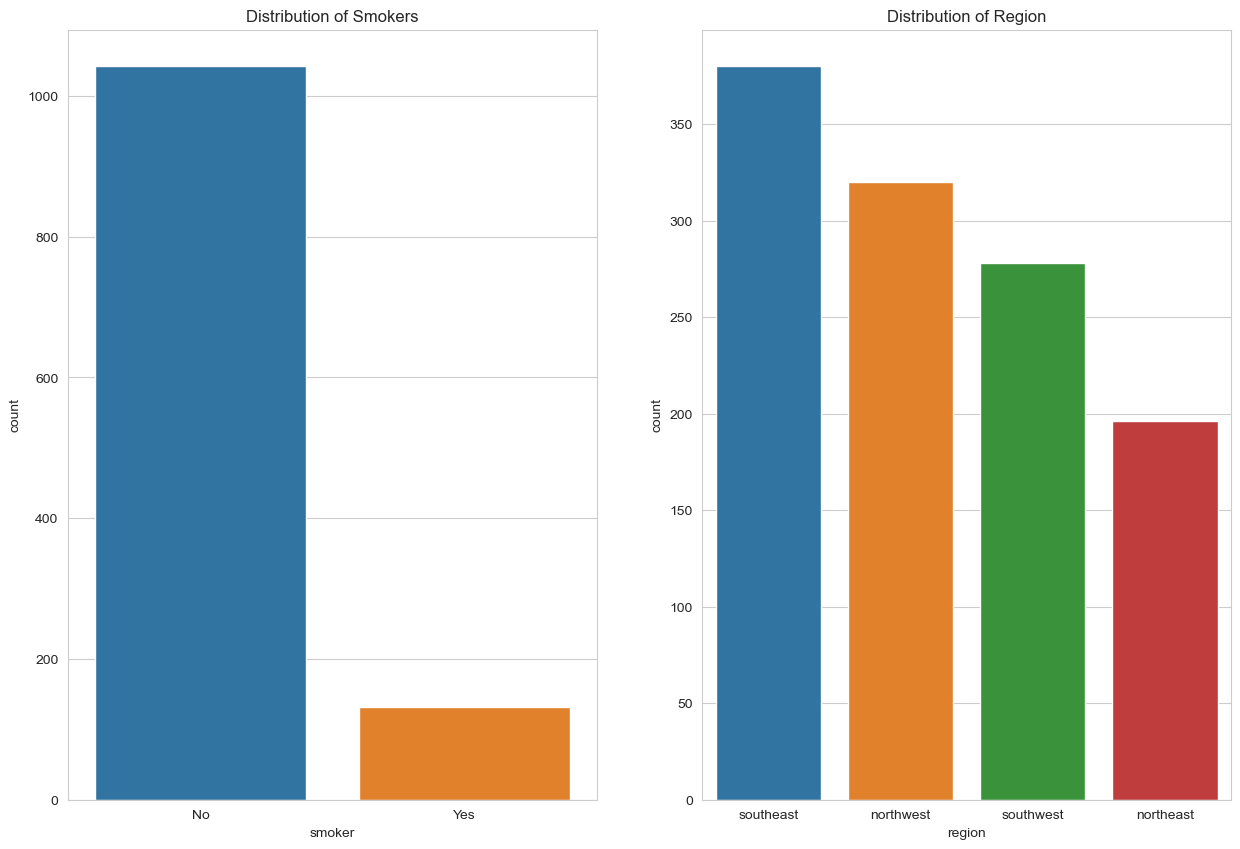

In [355]:
fig,axes = plt.subplots(1,2,figsize=(15,10))
sns.countplot(x='smoker',data=df,ax=axes[0]).set(title="Distribution of Smokers")
sns.countplot(x='region',data=df,ax=axes[1]).set(title="Distribution of Region")
plt.show()

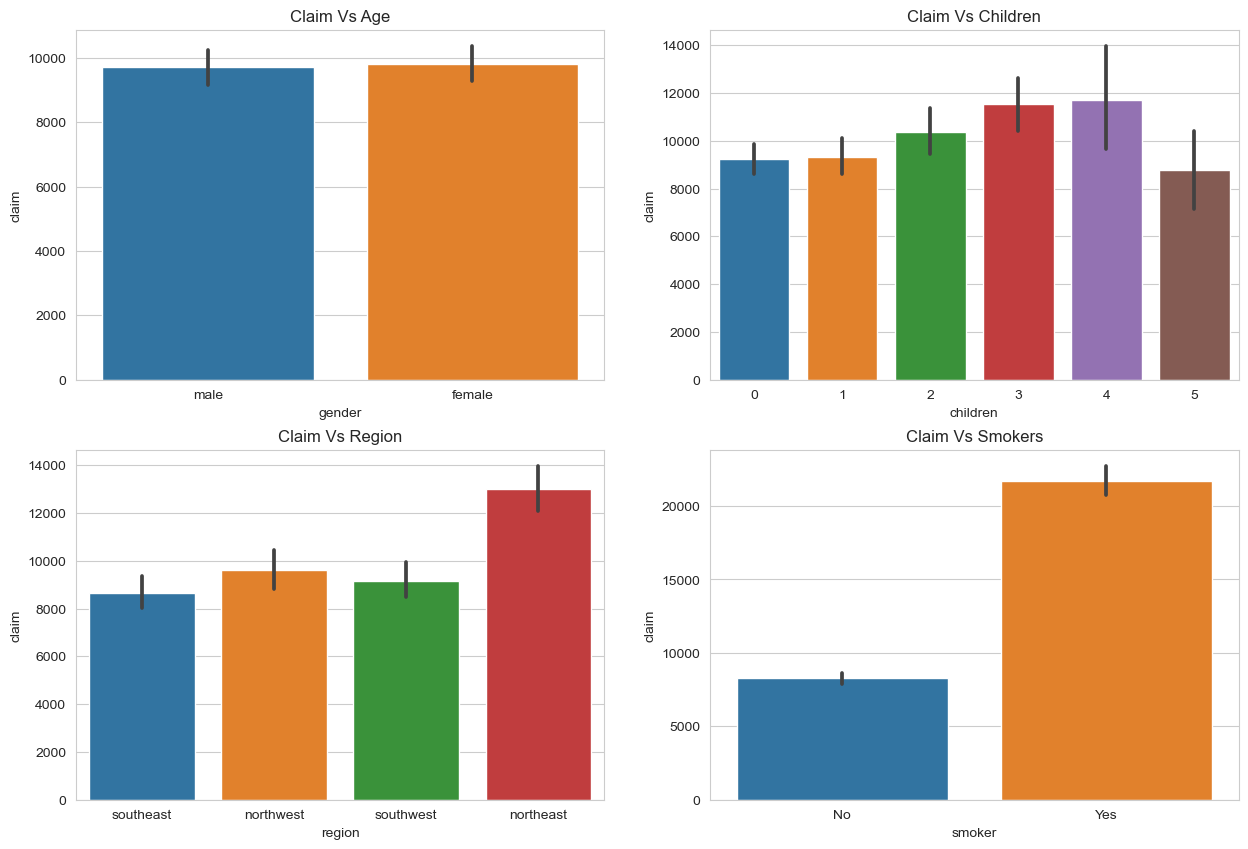

In [359]:
# effect of gender,childern,smoker and region on charges of insurance
fig,axes = plt.subplots(2,2,figsize=(15,10))
sns.barplot(x='gender',y='claim',data=df,ax=axes[0,0]).set(title="Claim Vs Age")
sns.barplot(x='children',y='claim',data=df,ax=axes[0,1]).set(title="Claim Vs Children")
sns.barplot(x='smoker',y='claim',data=df,ax=axes[1,1]).set(title="Claim Vs Smokers")
sns.barplot(x='region',y='claim',data=df,ax=axes[1,0]).set(title="Claim Vs Region")
plt.show()

<Axes: xlabel='claim'>

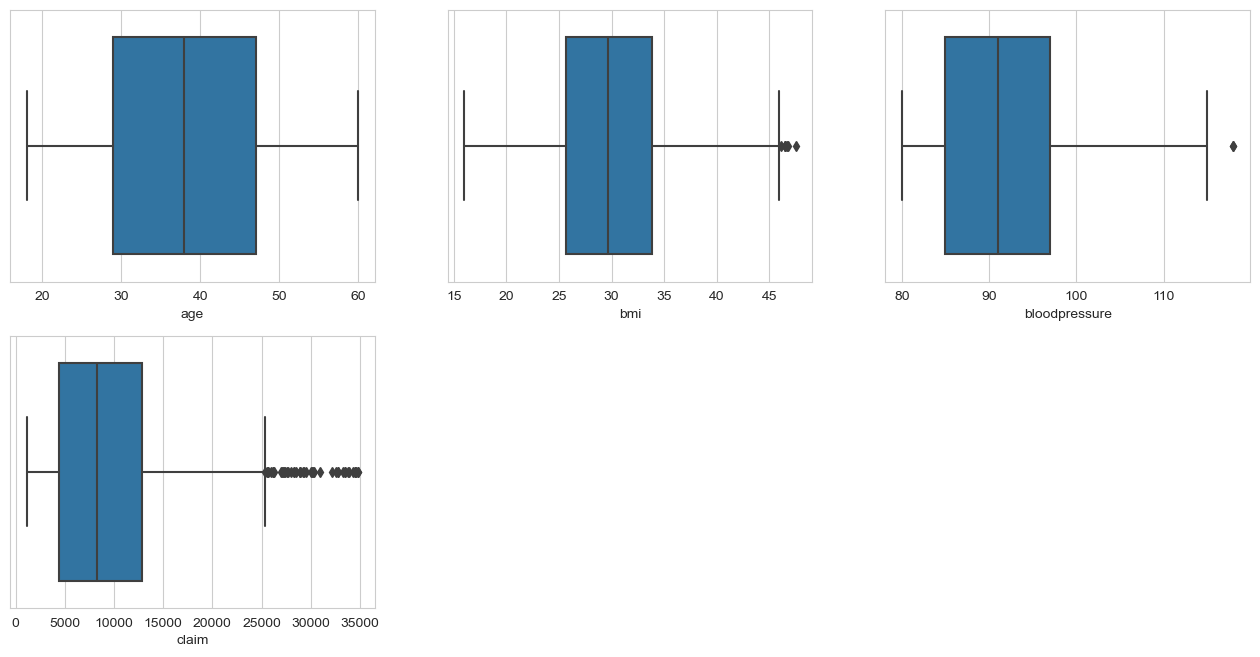

In [362]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='age',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='bmi',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='bloodpressure',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='claim',data=df)

In [363]:
# Age and BMI seems to have a normal distribution with most values clustered around the mean
# Index and Patient ID column has to be dropped as we cannot infer anything from those columns
# BMI, claim and bloodpressure has outliers toward higher end of distribution

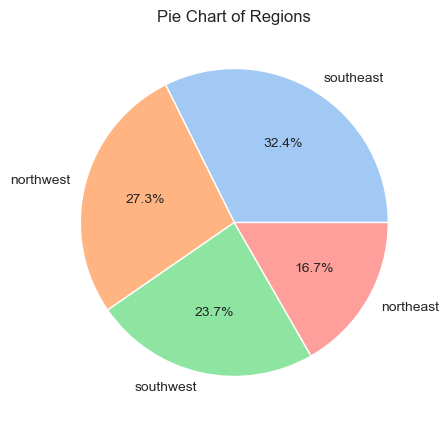

In [364]:
# Univariate Pie Chart
plt.figure(figsize=(8, 5))
df['region'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Regions')
plt.ylabel('')
plt.show()

In [365]:
# Region is categorical with four distinct values, and the proportions are relatively balanced.

<Axes: xlabel='age', ylabel='claim'>

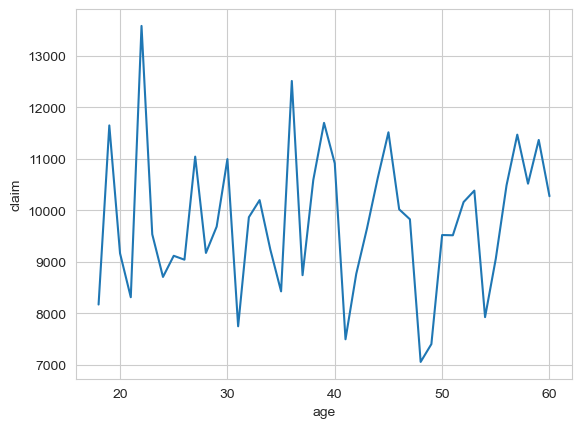

In [366]:
# Bivariate Line Plot
sns.lineplot(x='age', y='claim', data=df, errorbar=None)

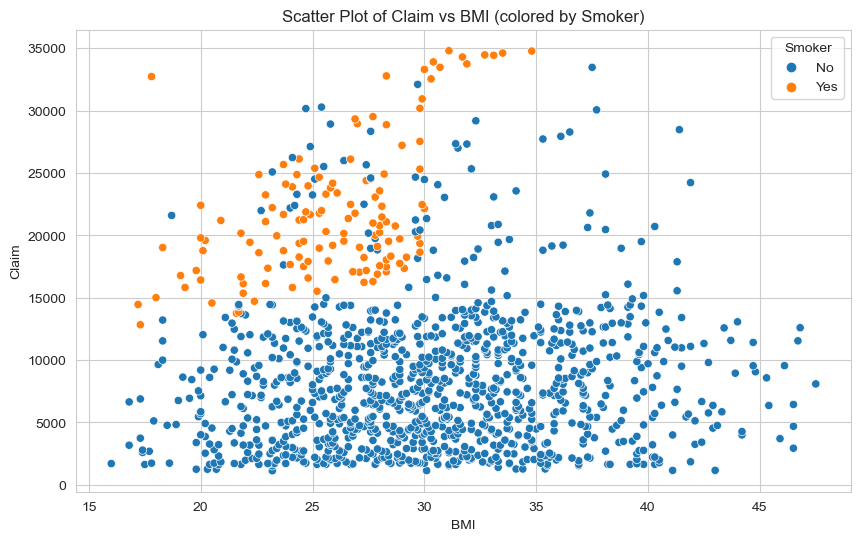

In [367]:
# Bivariate Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='claim', hue='smoker', data=df)
plt.title('Scatter Plot of Claim vs BMI (colored by Smoker)')
plt.xlabel('BMI')
plt.ylabel('Claim')
plt.legend(title='Smoker')
plt.show()

In [368]:
#  BMI shows some outliers towards the higher end of the distribution.
# Claim amount is positively correlated with age but seems to have a wider spread for smokers

### Data Pre Processing

In [ ]:
# Drop ID columns - index and PatientID
df = df.drop(columns=['index', 'PatientID'])

In [370]:
df.shape

(1174, 9)

In [371]:
# checking for duplicate values
df.duplicated().sum()

0

In [372]:
#  Remove rows with missing values
df = df.dropna()

In [373]:
df.shape

(1174, 9)

In [374]:
# Step 3: Split numeric columns into X
df_num = df.select_dtypes(include='number')
df_num.head()

,age,bmi,bloodpressure,children,claim
0,39.0,23.2,91,0,1121.87
1,24.0,30.1,87,0,1131.51
7,19.0,41.1,100,0,1146.80
8,20.0,43.0,86,0,1149.40
10,36.0,19.8,88,0,1241.57


In [375]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [376]:
lower_bound

age                 2.00000
bmi                13.55000
bloodpressure      67.00000
children           -3.00000
claim           -8141.28625
dtype: float64

In [377]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

In [378]:
df.shape

(1122, 9)

In [379]:
# outlier filter

# get thresholds for outlier
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [380]:
upper_bound

age                 74.00000
bmi                 45.95000
bloodpressure      115.00000
children             5.00000
claim            25382.18375
dtype: float64

In [381]:
df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]

C:\Users\Rasheeda_Banu\AppData\Local\Temp\ipykernel_14928\632167277.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df = df[~((df_num < lower_bound) | (df_num > upper_bound)).any(axis=1)]


In [382]:
df.shape

(1122, 9)

<Axes: xlabel='claim'>

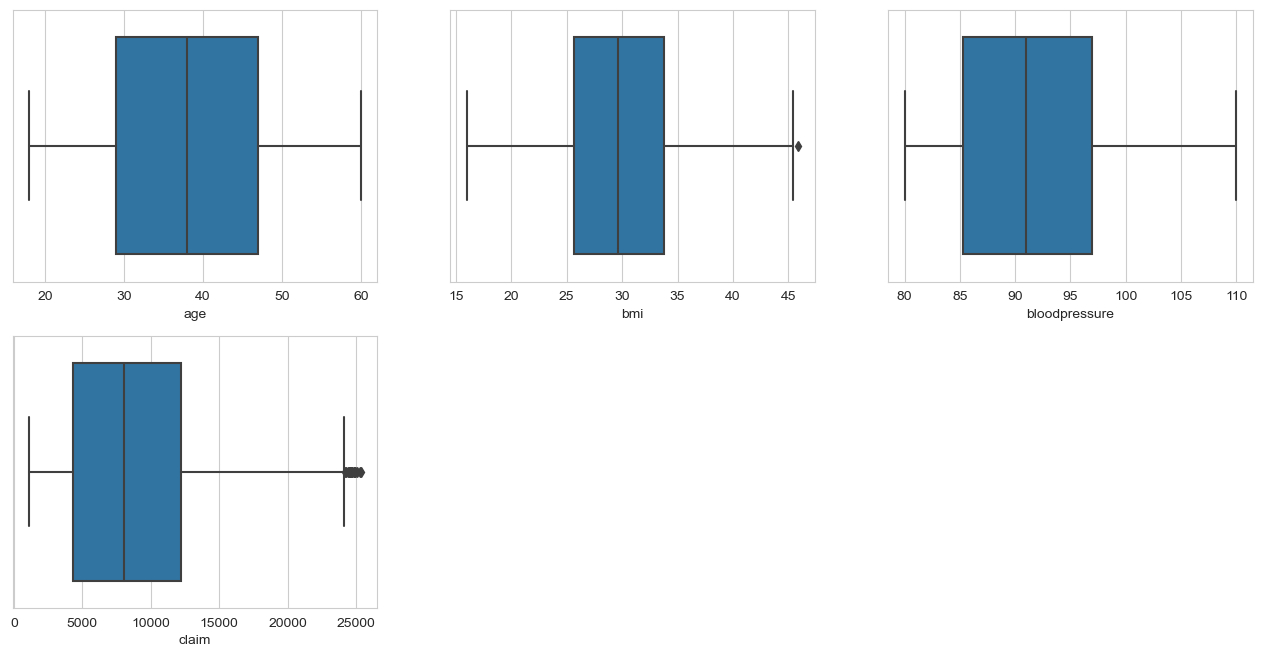

In [383]:
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='age',data=df)
plt.subplot(3,3,2)
sns.boxplot(x='bmi',data=df)
plt.subplot(3,3,3)
sns.boxplot(x='bloodpressure',data=df)
plt.subplot(3,3,4)
sns.boxplot(x='claim',data=df)

In [384]:
# We have treated outliers

In [385]:
X = df.drop('claim', axis=1)
y = df.claim
X.head()

,age,gender,bmi,bloodpressure,diabetic,children,smoker,region
0,39.0,male,23.2,91,Yes,0,No,southeast
1,24.0,male,30.1,87,No,0,No,southeast
7,19.0,male,41.1,100,No,0,No,northwest
8,20.0,male,43.0,86,No,0,No,northwest
10,36.0,male,19.8,88,Yes,0,No,northwest


In [386]:
X_num = X.select_dtypes('number')
X_num.head()

,age,bmi,bloodpressure,children
0,39.0,23.2,91,0
1,24.0,30.1,87,0
7,19.0,41.1,100,0
8,20.0,43.0,86,0
10,36.0,19.8,88,0


In [387]:
X_cat = X.select_dtypes('object')
X_cat.head()

,gender,diabetic,smoker,region
0,male,Yes,No,southeast
1,male,No,No,southeast
7,male,No,No,northwest
8,male,No,No,northwest
10,male,Yes,No,northwest


In [388]:
# Rescale numeric columns 
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [389]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)

In [390]:
X_num_scaled.describe()

,age,bmi,bloodpressure,children
count,1122.000000,1122.000000,1122.000000,1122.000000
mean,0.484509,0.465503,0.388384,0.218360
std,0.264371,0.195380,0.255126,0.243784
min,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.324415,0.175000,0.000000
50%,0.476190,0.454849,0.366667,0.200000
75%,0.690476,0.594482,0.566667,0.400000
max,1.000000,1.000000,1.000000,1.000000


In [391]:
# One-hot encode category columns
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)  # Drop_first to avoid multicollinearity

In [392]:
# Merge df_num and df_cat_encoded into X
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [393]:
 X.shape, X_num_scaled.shape, X_cat_encoded.shape

((1122, 14), (1122, 4), (1122, 10))

In [394]:
# Check for NA in X and y; Check for shape compatibility
print("\nStep 7: Checking for NAs and Shape Compatibility")
print(X.isnull().sum())
print(y.isnull().sum())
print(X.shape)
print(y.shape)


Step 7: Checking for NAs and Shape Compatibility
age                 0
bmi                 0
bloodpressure       0
children            0
gender_female       0
gender_male         0
diabetic_No         0
diabetic_Yes        0
smoker_No           0
smoker_Yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64
0
(1122, 14)
(1122,)


In [395]:
X.describe()

,age,bmi,bloodpressure,children,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
count,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,0.484509,0.465503,0.388384,0.218360,0.515152,0.484848,0.522282,0.477718,0.904635,0.095365,0.166667,0.270053,0.320856,0.242424
std,0.264371,0.195380,0.255126,0.243784,0.499993,0.499993,0.499726,0.499726,0.293850,0.293850,0.372844,0.444185,0.467014,0.428741
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.261905,0.324415,0.175000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.476190,0.454849,0.366667,0.200000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.690476,0.594482,0.566667,0.400000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [396]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [397]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape) 
print(y_test.shape)

(897, 14)
(225, 14)
(897,)
(225,)


In [287]:
# -  Observations after preprocessing
# - ID columns have been removed.
# - Rows with missing values have been removed.
# - Numeric and categorical features have been separated into X and y, respectively.
# - Numeric columns have been rescaled 
# - Category columns have been one-hot encoded to be used in the model.
# - The dataset has been split into train and test sets for model evaluation.

### KNN Regression

In [398]:
# Train the model with different K values and plot MAPE scores
k_values = np.arange(1,100,5)
train_mape_scores = []
test_mape_scores = []

In [399]:
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)

In [400]:
test_mape_scores

[0.866206057815439,
 0.754024260321868,
 0.7360099053841137,
 0.7271452759311046,
 0.7377166780098171,
 0.739392761945597,
 0.7373727683827909,
 0.7503148093096386,
 0.7519709987138364,
 0.7561837270581532,
 0.766111078264333,
 0.7642280798661735,
 0.7697818854246937,
 0.7723791005821934,
 0.7733678986926384,
 0.7770710847049527,
 0.7787967382409031,
 0.7804221655215438,
 0.7810937824968732,
 0.7803357239026046]

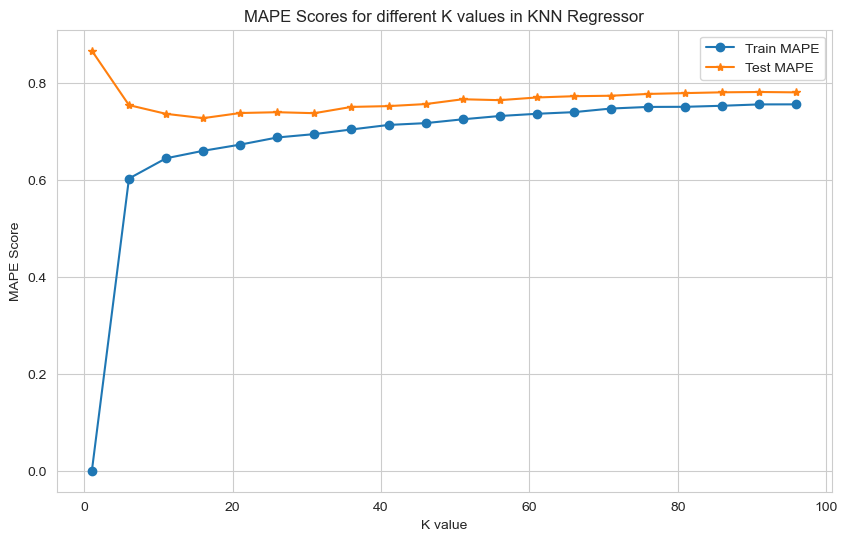

In [401]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='*', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

### Finding best value of k using holdout set method

In [409]:
k_values = np.arange(1,11,2)
train_mape_scores = []
test_mape_scores = []
best_mape=float('inf')

for k in k_values:
    knn=KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_pred=knn.predict(X_train)
    train_mape=mean_absolute_percentage_error(y_train,train_pred)
    test_pred=knn.predict(X_test)
    test_mape=mean_absolute_percentage_error(y_test,test_pred)
    train_mape_scores.append(train_mape)
    test_mape_scores.append(test_mape)
    
    if test_mape < best_mape:
        best_mape=test_mape
        best_k = k
        
print(f"The best K value for Hold Out set is {best_k}.")

The best K value for Hold Out set is 7.


### Finding best value of k using cross validation method

In [410]:
# Train the model with different K values and calculate MAPE scores using CV
k_values = np.arange(1, 11, 2)
cv_mape_scores = []
train_mape_scores = []
test_mape_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    
    # Calculate CV MAPE using cross-validation (CV) with full X and y
    cv_scores = -cross_val_score(knn, X_num_scaled, y, cv=5, scoring='neg_mean_absolute_percentage_error')
    cv_mape = np.mean(cv_scores)
    cv_mape_scores.append(cv_mape)
    
    # Train the model on the full training set and calculate train MAPE
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    train_mape = mean_absolute_percentage_error(y_train, train_pred)
    train_mape_scores.append(train_mape)
    
    # Calculate test MAPE
    test_pred = knn.predict(X_test)
    test_mape = mean_absolute_percentage_error(y_test, test_pred)
    test_mape_scores.append(test_mape)

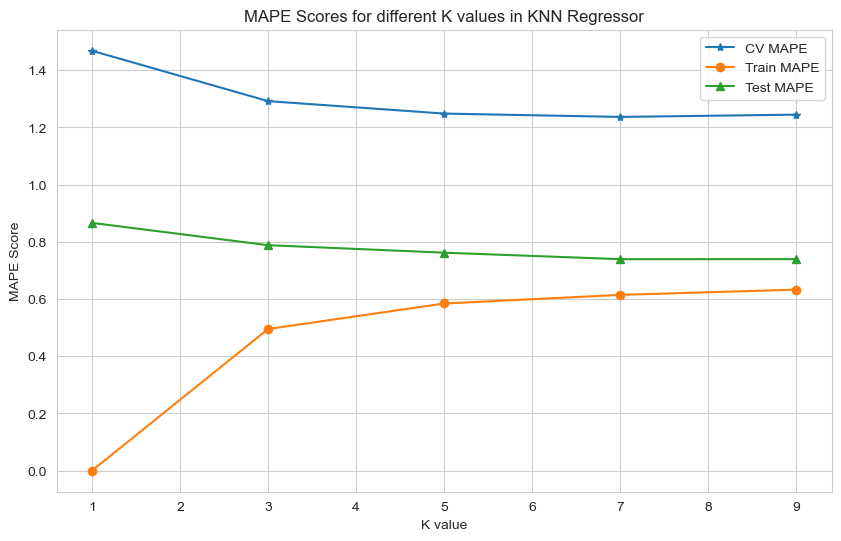

The best K value for CV is 7.


In [408]:
# Plot CV MAPE, Train MAPE, and Test MAPE for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_mape_scores, marker='*', label='CV MAPE')
plt.plot(k_values, train_mape_scores, marker='o', label='Train MAPE')
plt.plot(k_values, test_mape_scores, marker='^', label='Test MAPE')
plt.xlabel('K value')
plt.ylabel('MAPE Score')
plt.title('MAPE Scores for different K values in KNN Regressor')
plt.legend()
plt.show()

# Compare the best K value for CV
best_k_cv = k_values[np.argmin(cv_mape_scores)]
print(f"The best K value for CV is {best_k_cv}.")

### Linear Regression

In [411]:
from sklearn.metrics import mean_squared_error

lm = LinearRegression()
model = lm.fit(X_train,y_train)

In [412]:
model.score(X_train,y_train)


0.44271342267671776

In [413]:
y_train_pred=model.predict(X_train)
train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_RMSE

4378.831384953291

In [414]:
# predict
y_test_pred = model.predict(X_test)
y_test_pred
test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_RMSE

4368.6398712607715

In [415]:
model.score(X_test,y_test)


0.41045239466497974

In [416]:
model.intercept_, model.coef_


(-5.142718278700936e+16,
 array([ 1.01008930e+03,  3.42522403e+03,  4.15179705e+03,  2.67622289e+03,
        -2.18551474e+15, -2.18551474e+15,  8.12396332e+15,  8.12396332e+15,
         2.00338005e+15,  2.00338005e+15,  4.34853542e+16,  4.34853542e+16,
         4.34853542e+16,  4.34853542e+16]))

In [417]:
# predicted values
yhat_train = model.predict(X_train)

In [418]:
# Finding R Square 
rsquare=model.score(X_train,y_train)
rsquare

0.44271342267671776

In [419]:
# predict y_test using the model
yhat_test = model.predict(X_test)


In [420]:
# Calculating MSE on train and test
model_slr_MSE_train = np.mean((y_train - yhat_train)**2)
model_slr_MSE_test = np.mean((y_test - yhat_test)**2)
model_slr_MSE_train, model_slr_MSE_test

(19174164.29785195, 19085014.324769333)

In [421]:
# Calculating MAPE on train and test
model_slr_MAPE_train = np.mean((abs(y_train - yhat_train)/y_train)*100)
model_slr_MAPE_test = np.mean((abs(y_test - yhat_test)/y_test)*100)
     

In [422]:
model_slr_performance = {'model':"model_slr",'R Sq':rsquare,'train_MSE':model_slr_MSE_train,'test_MSE':model_slr_MSE_test,'train_MAPE':model_slr_MAPE_train,'test_MAPE':model_slr_MAPE_test}


In [423]:
import statsmodels.api as sm
Xrm_train = sm.add_constant(X_train)


In [424]:
Xrm_train.head()


,const,age,bmi,bloodpressure,children,gender_female,gender_male,diabetic_No,diabetic_Yes,smoker_No,smoker_Yes,region_northeast,region_northwest,region_southeast,region_southwest
1123,1.0,1.000000,0.488294,0.166667,0.4,1,0,1,0,1,0,0,1,0,0
887,1.0,0.976190,0.638796,0.133333,0.0,1,0,0,1,1,0,0,0,0,1
195,1.0,0.357143,0.528428,0.600000,0.4,1,0,0,1,1,0,0,0,1,0
1061,1.0,0.690476,0.595318,0.600000,0.0,0,1,1,0,1,0,0,1,0,0
1137,1.0,0.952381,0.739130,0.466667,0.4,1,0,1,0,1,0,1,0,0,0


In [425]:
sm_model = sm.OLS(y_train,Xrm_train)
results = sm_model.fit()

In [426]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  claim   R-squared:                       0.443
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                     70.39
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          2.06e-105
Time:                        13:08:26   Log-Likelihood:                -8793.7
No. Observations:                 897   AIC:                         1.761e+04
Df Residuals:                     886   BIC:                         1.766e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             3508.7520    213.591     16.427      0.000    3089.549    3927.955
age               1013.3142    606.826      1.670      0.095    -177.670    2204.298
bmi               3416.3943    798.426      4.279      0.000    1849.367    4983.422
bloodpressure     4166.9612    593.701      7.019      0.000    3001.737    5332.185
children          2657.8034    605.183      4.392      0.000    1470.044    3845.563
gender_female     1864.9104    208.461      8.946      0.000    1455.776    2274.045
gender_male       1643.8416    173.751      9.461      0.000    1302.830    1984.854
diabetic_No       1788.7087    189.329      9.448      0.000    1417.123    2160.294
diabetic_Yes      1720.0433    175.846      9.782      0.000    1374.920    2065.166
smoker_No        -4037.2493    255.591    -15.796      0.000   -4538.884   -3535.615
smoker_Yes        7546.0013    301.654     25.015      0.000    6953.963    8138.040
region_northeast  2927.8535    305.889      9.572      0.000    2327.503    3528.204
region_northwest   124.0859    253.355      0.490      0.624    -373.160     621.332
region_southeast  -150.1384    251.252     -0.598      0.550    -643.258     342.981
region_southwest   606.9509    272.304      2.229      0.026      72.515    1141.387
==============================================================================
Omnibus:                      161.551   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.874
Skew:                           1.079   Prob(JB):                     5.65e-65
Kurtosis:                       4.805   Cond. No.                     6.59e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""